# TABLE OF CONTENTS

__1. Problem Description__
   
__2. Importing required libraries__

__3. Loading dataset__

__4. Exploratory Data Analysis (EDA)__
   - Checking shape,unique values,statistics and datatypes of data
   
__5. Preprocessing__
   - Dropping unnecessary variables
   - Typecasting obvious datatypes
   
__6. Chi-Square Dependency Test__

__7. Visualization__
        
__8. Feature Engineering__

__9. Splitting data into train and validation__

__10. Preperation for Model Building__
   - Checking and Imputing Missing values
   - Target Encoding
   - Initiating Pipeline with StandardScaler and Onehotencoding
    
__12. Building Models__

# Problem Description

### Identify whether a consumer will make a transaction next month

Every month lakhs of consumers purchase their prescription medicines from Generico stores. Month after month, we lose few consumers and gain few. 
The training dataset contains bill level data of all consumers transacted during April 2019 – September 2019. 
And the test/holdout dataset contains binary 1/0 for all consumers (in test data) who’ve transacted in October 2019. 


## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer                                # Knn Imputation function
from sklearn.preprocessing import StandardScaler, OneHotEncoder            
from scipy.stats import skew                                         # importing skew function
import category_encoders as ce                                       # importing target encoders
import statsmodels.api as sm

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Loading Data

In [3]:
train_data = pd.read_csv("purchase_data_bill_level_sept.csv",header=0)

In [4]:
test_data = pd.read_csv("out_of_time_test_oct.csv",header=0)

In [5]:
test_data.head()

,customer_ref_id,oct_purchase_flag
0,6251676,0
1,6702206,0
2,6689660,1
3,8539983,0
4,8539984,0


In [6]:
test_data.shape

(278136, 2)

### Data Preperation

In [7]:
train_data['customer_ref_id'].nunique()

278136

In [8]:
# Merging both target data and attributes data on Custmer_ref_id

train_data=train_data.merge(test_data,how='inner',on='customer_ref_id')

# Exploratory Data Analysis

In [9]:
train_data.head()

,bill_ref_id,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,created_at_bill,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,...,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1,oct_purchase_flag
0,7562292,468,6251676,6628790,cash,2019-04-01 09:09:51.000000,3,12,394.6,146.92,...,0,11,1,0,0,0,10,2,0,0
1,7727438,468,6251676,6628790,cash,2019-04-10 17:23:29.000000,1,2,70.0,41.32,...,0,0,2,0,0,0,0,2,0,0
2,7827629,468,6251676,6628790,cash,2019-04-15 21:55:02.000000,1,2,70.0,41.66,...,0,0,2,0,0,0,0,2,0,0
3,11318230,468,6251676,6628790,cash,2019-05-09 14:07:14.000000,2,11,464.4,148.96,...,0,10,1,0,0,0,10,1,0,0
4,7562335,468,6702206,7298144,cash,2019-04-01 09:30:17.000000,1,1,50.5,26.04,...,0,1,0,0,0,0,0,1,0,0


In [10]:
train_data.columns

Index(['bill_ref_id', 'store_ref_id', 'customer_ref_id', 'doctor_ref_id',
       'payment_method', 'created_at_bill', 'num_drugs_bill',
       'total_quantity_bill', 'mrp_bill', 'total_spend_bill',
       'return_value_bill', 'returned_quantity_bill', 'quantity_ethical',
       'quantity_generic', 'quantity_surgical', 'quantity_ayurvedic',
       'quantity_general', 'quantity_otc', 'quantity_chronic',
       'quantity_acute', 'quantity_h1', 'oct_purchase_flag'],
      dtype='object')

In [11]:
train_data.shape

(1184025, 22)

In [12]:
train_data.shape

(1184025, 22)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184025 entries, 0 to 1184024
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   bill_ref_id             1184025 non-null  int64  
 1   store_ref_id            1184025 non-null  int64  
 2   customer_ref_id         1184025 non-null  int64  
 3   doctor_ref_id           1184025 non-null  int64  
 4   payment_method          1184022 non-null  object 
 5   created_at_bill         1184025 non-null  object 
 6   num_drugs_bill          1184025 non-null  int64  
 7   total_quantity_bill     1184025 non-null  int64  
 8   mrp_bill                1184025 non-null  float64
 9   total_spend_bill        1184025 non-null  float64
 10  return_value_bill       1184025 non-null  float64
 11  returned_quantity_bill  1184025 non-null  int64  
 12  quantity_ethical        1184025 non-null  int64  
 13  quantity_generic        1184025 non-null  int64  
 14  qu

In [14]:
train_data.nunique()

bill_ref_id               1184025
store_ref_id                   43
customer_ref_id            278136
doctor_ref_id               72099
payment_method                  6
created_at_bill           1089104
num_drugs_bill                 49
total_quantity_bill           257
mrp_bill                   200462
total_spend_bill           229685
return_value_bill           18147
returned_quantity_bill         88
quantity_ethical              159
quantity_generic              194
quantity_surgical             103
quantity_ayurvedic             30
quantity_general               80
quantity_otc                   30
quantity_chronic              155
quantity_acute                224
quantity_h1                    50
oct_purchase_flag               2
dtype: int64

# Preprocessing

### Drop Unnecessary variables Train Data

In [15]:
train_data.head()

,bill_ref_id,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,created_at_bill,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,...,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1,oct_purchase_flag
0,7562292,468,6251676,6628790,cash,2019-04-01 09:09:51.000000,3,12,394.6,146.92,...,0,11,1,0,0,0,10,2,0,0
1,7727438,468,6251676,6628790,cash,2019-04-10 17:23:29.000000,1,2,70.0,41.32,...,0,0,2,0,0,0,0,2,0,0
2,7827629,468,6251676,6628790,cash,2019-04-15 21:55:02.000000,1,2,70.0,41.66,...,0,0,2,0,0,0,0,2,0,0
3,11318230,468,6251676,6628790,cash,2019-05-09 14:07:14.000000,2,11,464.4,148.96,...,0,10,1,0,0,0,10,1,0,0
4,7562335,468,6702206,7298144,cash,2019-04-01 09:30:17.000000,1,1,50.5,26.04,...,0,1,0,0,0,0,0,1,0,0


In [16]:
train_data.drop("bill_ref_id",axis=1,inplace=True)     #all unique values

In [17]:
train_data.dtypes

store_ref_id                int64
customer_ref_id             int64
doctor_ref_id               int64
payment_method             object
created_at_bill            object
num_drugs_bill              int64
total_quantity_bill         int64
mrp_bill                  float64
total_spend_bill          float64
return_value_bill         float64
returned_quantity_bill      int64
quantity_ethical            int64
quantity_generic            int64
quantity_surgical           int64
quantity_ayurvedic          int64
quantity_general            int64
quantity_otc                int64
quantity_chronic            int64
quantity_acute              int64
quantity_h1                 int64
oct_purchase_flag           int64
dtype: object

### Typecasting Obvious datatypes 

In [18]:
for col in ['store_ref_id','customer_ref_id','doctor_ref_id','payment_method','oct_purchase_flag']:
    train_data[col] = train_data[col].astype('category')

In [19]:
train_data.head(2)

,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,created_at_bill,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,...,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1,oct_purchase_flag
0,468,6251676,6628790,cash,2019-04-01 09:09:51.000000,3,12,394.6,146.92,0.0,...,0,11,1,0,0,0,10,2,0,0
1,468,6251676,6628790,cash,2019-04-10 17:23:29.000000,1,2,70.0,41.32,0.0,...,0,0,2,0,0,0,0,2,0,0


# Chi square test: check dependency of categorical columns with Target

In [20]:
from scipy.stats import chi2_contingency              # importing
import statsmodels.api as sm

In [21]:
cat_cols = train_data.select_dtypes('category').columns
cat_cols

Index(['store_ref_id', 'customer_ref_id', 'doctor_ref_id', 'payment_method',
       'oct_purchase_flag'],
      dtype='object')

In [22]:
## Defining Function for Chi-square test

def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [23]:
for col in cat_cols:                                           #Chi-Square Dependency test for Categorical Columns
    find_chi2_independence(col, 'oct_purchase_flag', train_data)

---------------oct_purchase_flag Vs store_ref_id Chi Square Test of Independence -------------------

 Contingency table :

[[   17   121  1850  1916   838  1714  2117  5380  6289  7904  6523  3970
   7513  7144 10664  8131 21534 11026 17826  9950 16172 16006 14714 15053
  12908 17773 13095 11962 10344 11995 14094 14162 10734 10262 16889 14200
  14567 18134 11845 18002 11696 19791 16907]
 [   12   157  2135  3357  1440  2216  2916  6583  8821  9834  8485  6518
   9710 10584 15335 13306 26191 17930 27382 13002 21428 24619 24199 23796
  21460 25689 19548 18291 16070 22927 22412 28210 19574 16918 24230 24914
  25755 30299 13422 24203 18702 34667 33046]]

 Expected table :

[[1.13580609e+01 1.08880721e+02 1.56075422e+03 2.06520879e+03
  8.92195263e+02 1.53921307e+03 1.97121104e+03 4.68539593e+03
  5.91794136e+03 6.94721667e+03 5.87799232e+03 4.10770146e+03
  6.74551317e+03 6.94330010e+03 1.01826974e+04 8.39595691e+03
  1.86918432e+04 1.13408279e+04 1.77060419e+04 8.98931768e+03
  1.4726313

 __Observation__ 

- All categorical columns are dependent to target variable "oct_purchase_flag"

#  Visualization (Attribute Analysis)
------------------------

### Analysing Categorical Columns

In [24]:
train_data.describe(include='category')

,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,oct_purchase_flag
count,1184025,1184025,1184025,1184022,1184025
unique,43,278136,72099,6,2
top,471,8383725,6478885,cash,1
freq,54458,47850,60181,1033440,720293


#### Analysing Target Variable

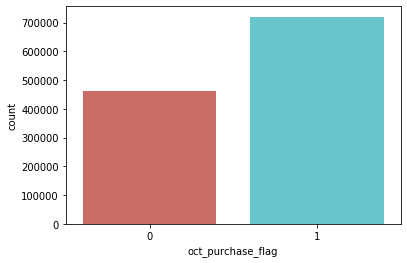

In [25]:
sns.countplot(x='oct_purchase_flag',data=train_data, palette='hls')
plt.show()

In [26]:
count_no_sub = len(train_data[train_data['oct_purchase_flag']==0])
count_sub = len(train_data[train_data['oct_purchase_flag']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no comeback is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of comeback", pct_of_sub*100)

percentage of no comeback is 39.16572707501953
percentage of comeback 60.83427292498047


__Observation:__
 - 40:60 percent is fine, we do not have class imbalance

In [27]:
train_data.groupby('oct_purchase_flag').mean()

,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,returned_quantity_bill,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1
oct_purchase_flag,,,,,,,,,,,,,,,
0,2.201323,4.188460,458.776161,286.856986,8.321066,0.094169,1.716047,2.163375,0.159249,0.044508,0.072156,0.013885,1.770805,2.417655,0.043284
1,2.501154,4.846696,523.132847,319.535992,8.836237,0.102263,1.932198,2.620745,0.140718,0.044461,0.073302,0.014297,2.434059,2.412636,0.037730


### Point to be noted
 - who is buying more medicines and spending more there are more chances he will come back
 - who is getting more discount,more chances to come back
 - if the customer did not visit from long time, means less chances to come back

In [28]:
train_data.groupby('payment_method').mean()

,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,returned_quantity_bill,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1
payment_method,,,,,,,,,,,,,,,
card,3.436027,7.821588,1023.408462,669.476717,16.886068,0.164085,3.553822,3.809795,0.264936,0.055765,0.085822,0.027284,3.964975,3.856613,0.069316
cash,2.253334,4.184686,432.606092,261.560089,7.636928,0.091612,1.634869,2.270820,0.132911,0.042983,0.070946,0.012255,1.961776,2.222910,0.035788
cheque,6.965318,40.774566,4919.572370,3689.620760,24.843908,0.202312,25.479769,14.184971,0.265896,0.115607,0.075145,0.647399,20.138728,20.635838,0.734104
paytm,2.562040,5.146444,577.762016,361.335696,6.884958,0.076999,2.117312,2.687788,0.173124,0.049534,0.080628,0.021775,2.201177,2.945267,0.049338
phonepe,2.626801,5.310530,614.750264,389.087873,10.560885,0.098974,2.168607,2.756764,0.207357,0.050763,0.085048,0.022697,2.139319,3.171211,0.065168
upi,2.642241,6.775862,740.648793,492.473983,51.198412,0.379310,2.517241,3.560345,0.159483,0.034483,0.465517,0.021552,1.862069,4.913793,0.038793


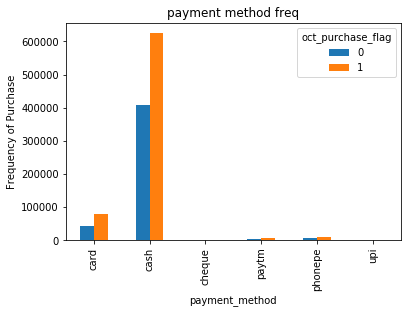

In [29]:
%matplotlib inline
pd.crosstab(train_data.payment_method,train_data.oct_purchase_flag).plot(kind='bar')
plt.title('payment method freq')
plt.xlabel('payment_method')
plt.ylabel('Frequency of Purchase')
plt.savefig('freq payment')

__Observation:__
- payment method is looking independent of customer come back

In [30]:
train_data.groupby('store_ref_id').mean()

,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,returned_quantity_bill,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1
store_ref_id,,,,,,,,,,,,,,,
355,1.827586,2.758621,367.837586,234.121897,3.660345,0.034483,1.206897,1.413793,0.000000,0.034483,0.000000,0.068966,1.586207,1.172414,0.000000
360,1.812950,3.140288,1023.958921,465.261322,152.145863,0.039568,1.241007,1.741007,0.068345,0.003597,0.075540,0.007194,1.064748,2.075540,0.014388
366,2.212296,4.136512,507.682715,312.615237,23.734895,0.215809,1.449686,2.323212,0.184442,0.053199,0.101380,0.011041,1.723212,2.413300,0.032873
371,2.205007,3.993173,468.460950,305.795946,18.292959,0.148303,1.733738,1.973070,0.081168,0.072824,0.104684,0.020861,1.597383,2.395790,0.022947
376,2.072871,3.501756,407.207858,239.510453,11.809129,0.149254,1.285777,1.802458,0.116769,0.053995,0.199298,0.036435,1.295435,2.206321,0.016681
378,2.046819,3.550127,408.912532,230.362000,13.359457,0.179389,1.288041,2.018321,0.076590,0.082443,0.054198,0.010178,1.466412,2.083715,0.042494
379,2.278363,4.083251,452.098571,277.289444,17.756820,0.187165,1.585933,2.112060,0.172462,0.049473,0.116630,0.033777,1.476455,2.606795,0.035168
380,2.581877,5.002341,573.081230,337.024263,19.649905,0.186742,1.554460,3.094876,0.172281,0.037616,0.104823,0.016551,2.141520,2.860821,0.032183
386,2.313567,4.054732,442.845169,266.198048,14.905215,0.172204,1.538782,2.243216,0.111714,0.054136,0.074983,0.013038,1.827796,2.226936,0.022038


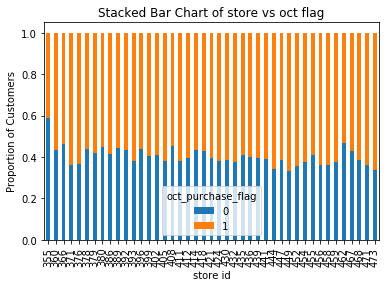

In [31]:
table=pd.crosstab(train_data.store_ref_id,train_data.oct_purchase_flag)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of store vs oct flag')
plt.xlabel('store id')
plt.ylabel('Proportion of Customers')
plt.savefig('Stacked Bar Chart of store vs oct flag')

### It can be a good predictor
 - whatever marketing strategy we are following at store 473, we can follow same on other store where customer are returing less like 355
 - we can check mean of all kind of medicines store wise and can manage supply demand

## Analysing Numerical Columns

In [32]:
train_data.corr()

,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,returned_quantity_bill,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1
num_drugs_bill,1.000000,0.585460,0.455945,0.468739,0.058487,0.057283,0.474031,0.445058,0.088033,0.080220,0.050570,0.040653,0.534012,0.372626,0.068700
total_quantity_bill,0.585460,1.000000,0.624812,0.595662,0.145575,0.296554,0.652272,0.787226,0.326121,0.054310,0.193073,0.112387,0.675754,0.820003,0.171672
mrp_bill,0.455945,0.624812,1.000000,0.827209,0.207741,0.122158,0.487282,0.449405,0.225706,0.021119,0.016619,0.061122,0.520671,0.435902,0.111271
total_spend_bill,0.468739,0.595662,0.827209,1.000000,0.252869,0.126819,0.656053,0.303395,0.163413,0.032806,0.018222,0.092360,0.495503,0.416247,0.145121
return_value_bill,0.058487,0.145575,0.207741,0.252869,1.000000,0.493260,0.134124,0.100984,0.025693,0.002256,0.002815,0.003202,0.068639,0.142459,0.011613
returned_quantity_bill,0.057283,0.296554,0.122158,0.126819,0.493260,1.000000,0.193534,0.270747,0.037078,0.004004,0.007214,0.001527,0.069976,0.344444,0.012893
quantity_ethical,0.474031,0.652272,0.487282,0.656053,0.134124,0.193534,1.000000,0.165867,0.079916,0.009735,0.012504,0.089941,0.502016,0.487313,0.255844
quantity_generic,0.445058,0.787226,0.449405,0.303395,0.100984,0.270747,0.165867,1.000000,0.022543,0.006854,0.036257,0.040778,0.608985,0.585727,0.047208
quantity_surgical,0.088033,0.326121,0.225706,0.163413,0.025693,0.037078,0.079916,0.022543,1.000000,0.009267,0.023551,0.008736,0.000812,0.437907,0.026838
quantity_ayurvedic,0.080220,0.054310,0.021119,0.032806,0.002256,0.004004,0.009735,0.006854,0.009267,1.000000,0.029929,0.009576,-0.004196,0.076289,-0.004508


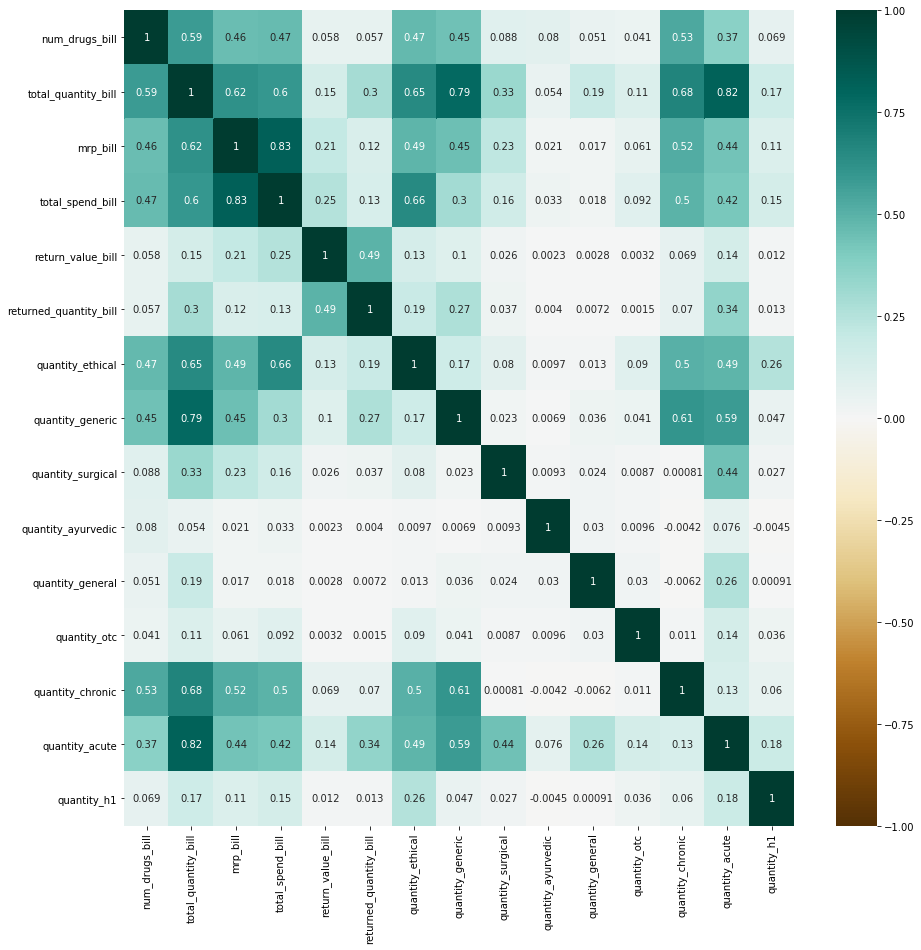

In [33]:
plt.figure(figsize =(15,15))
sns.heatmap(train_data.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

__Observation:__
 - Need to check for multicollinearty after standardizing

In [34]:
num_cols = train_data.select_dtypes("int64","float64").columns
num_cols

Index(['num_drugs_bill', 'total_quantity_bill', 'returned_quantity_bill',
       'quantity_ethical', 'quantity_generic', 'quantity_surgical',
       'quantity_ayurvedic', 'quantity_general', 'quantity_otc',
       'quantity_chronic', 'quantity_acute', 'quantity_h1'],
      dtype='object')

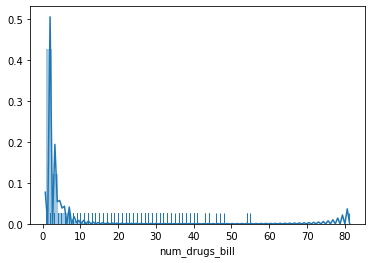

In [35]:
sns.distplot(train_data.num_drugs_bill, bins=50, kde=True, rug=True)

#### *Number of drugs per customer in between 1-4 mostly*

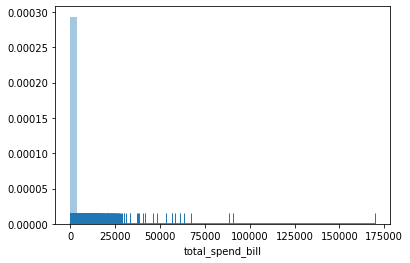

In [36]:
sns.distplot(train_data.total_spend_bill, bins=50, kde=True, rug=True)

#### *Amount apying per customer in from 0-22000 approx*

## Checking Outliers with Boxplot

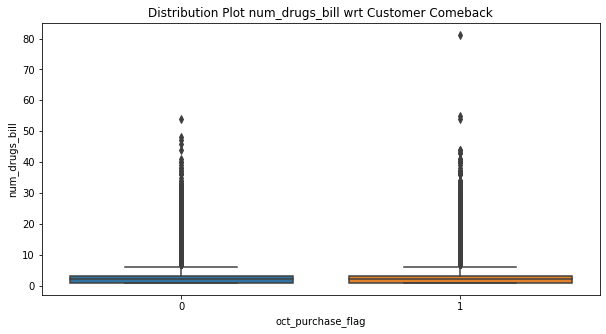

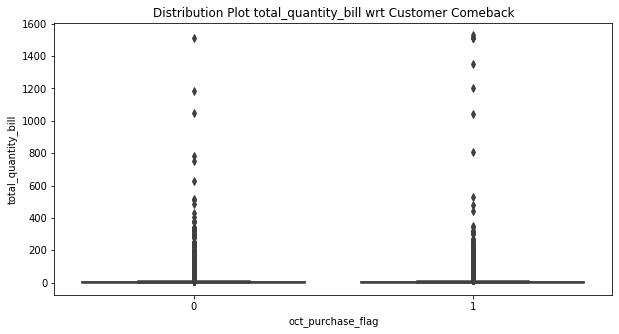

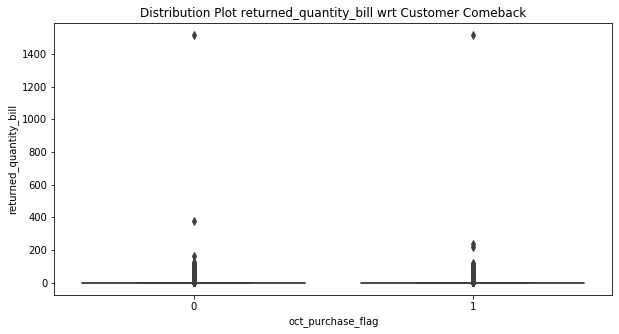

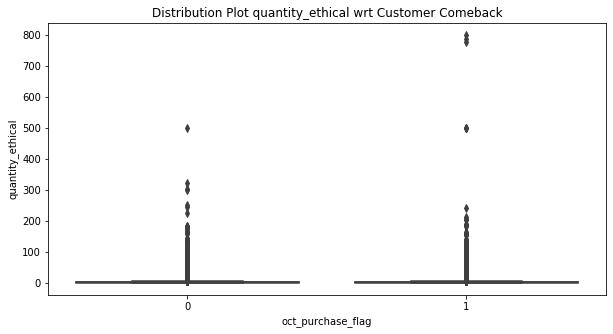

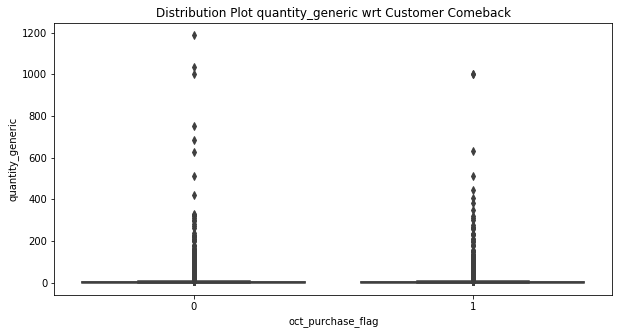

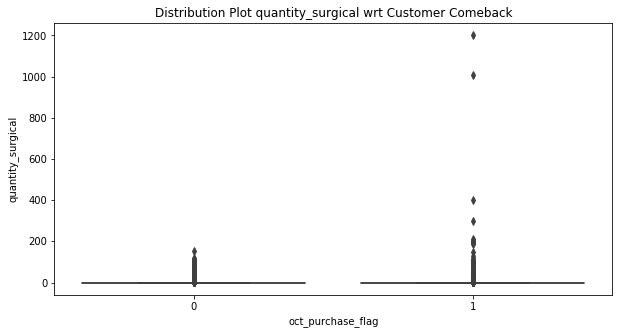

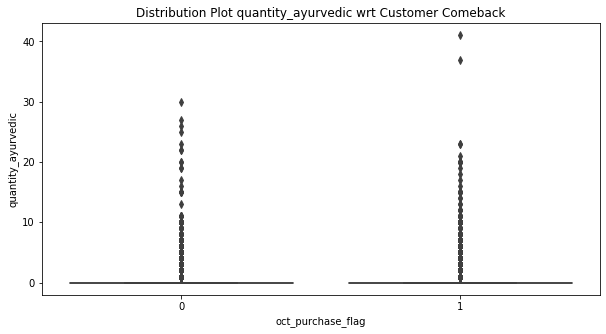

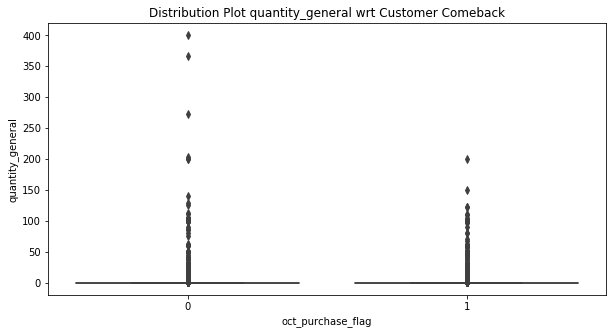

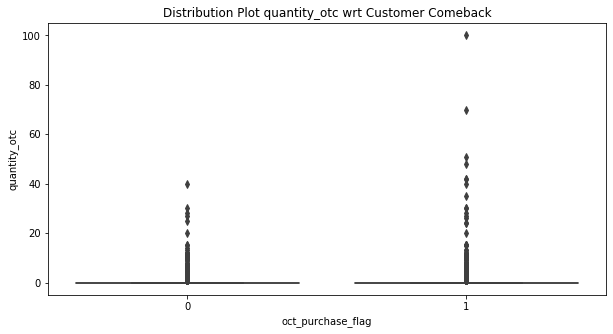

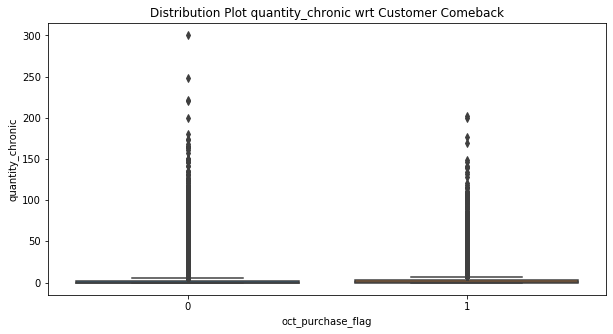

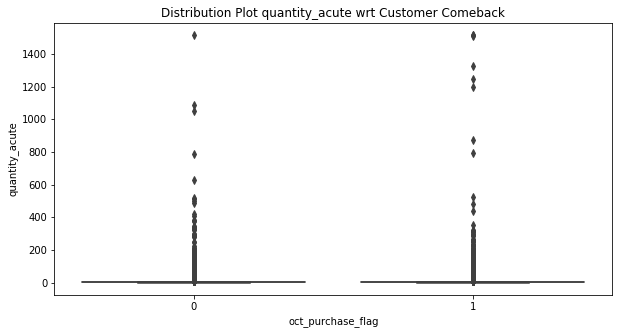

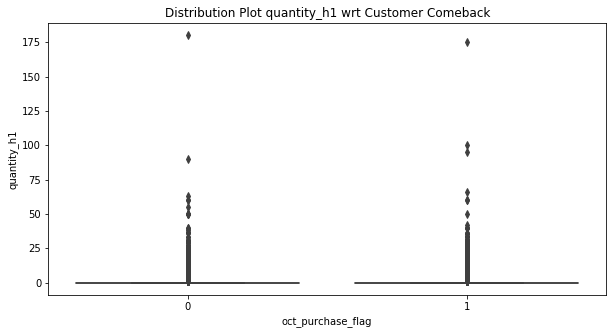

In [37]:
### Loop displaying Box Plot for all numerical columns wrt oct_purchase_flag  
    
for col in num_cols:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data = train_data, y = col, x = "oct_purchase_flag")
    plt.xlabel("oct_purchase_flag")
    plt.ylabel(col)
    plt.title("Distribution Plot" + " " + col + " " + "wrt Customer Comeback")

    plt.show()
    
   

#### __Observation__ 

After analysing all the boxplots of Numerical variables wrt oct_purchase_flag :

1. Many columns have outliers which should be removed and again checked for outliers 

## Outliers

In [38]:
## Removing Outliers
for x in num_cols:
    median = train_data[x].median()
    std = train_data[x].std()
    outliers = (train_data[x] - median).abs() > 1.5*std
    train_data.loc[outliers,x] = np.nan
    train_data[x].fillna(median, inplace=True)

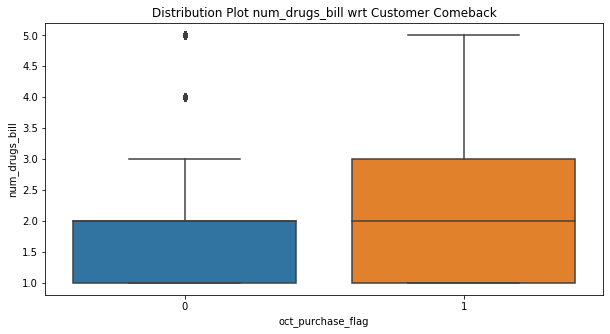

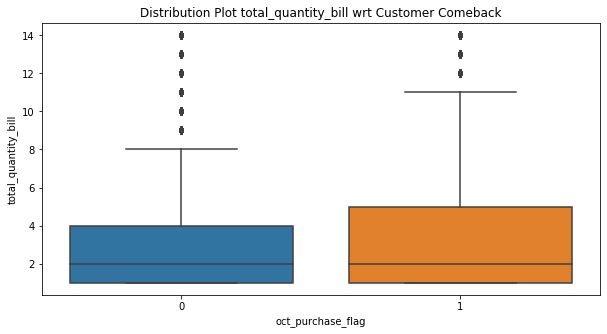

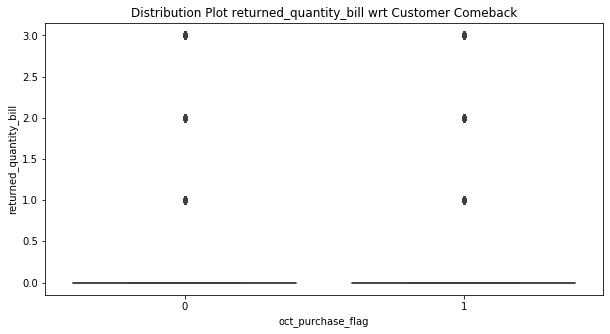

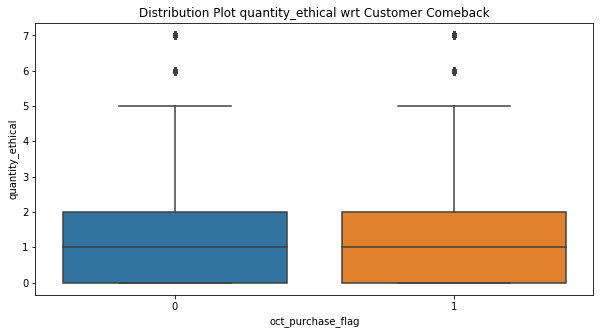

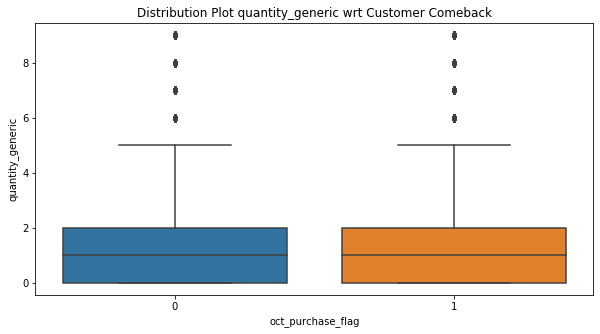

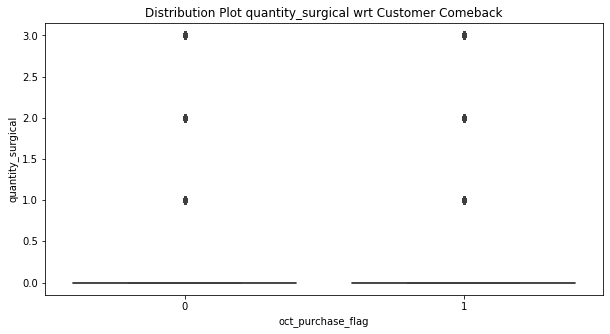

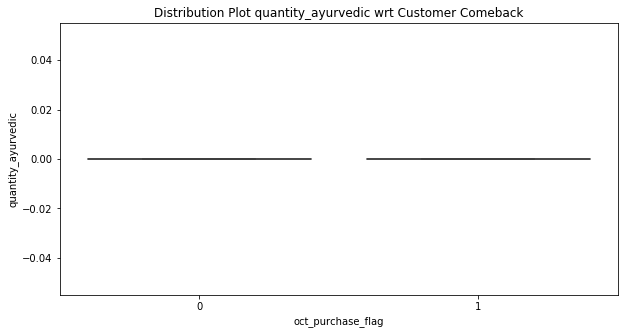

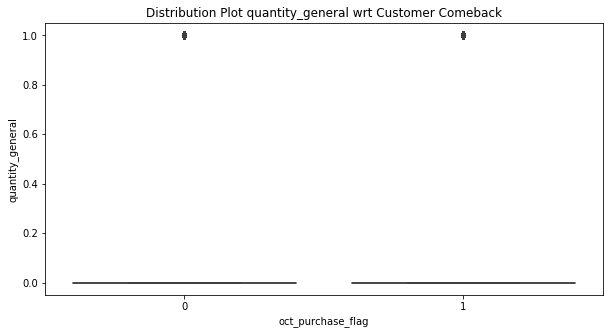

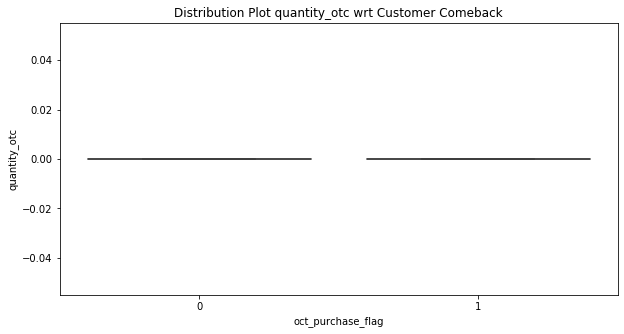

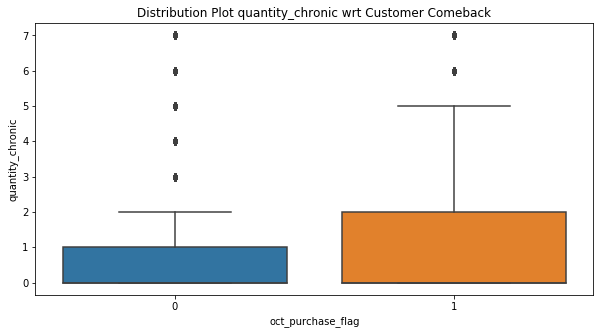

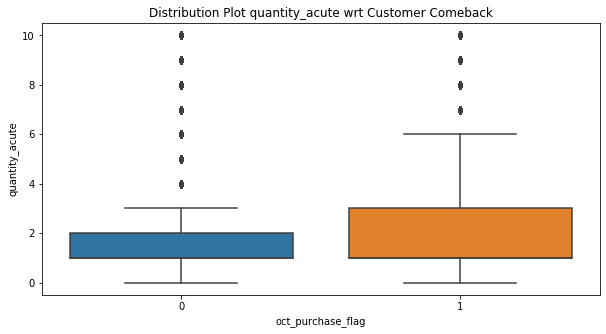

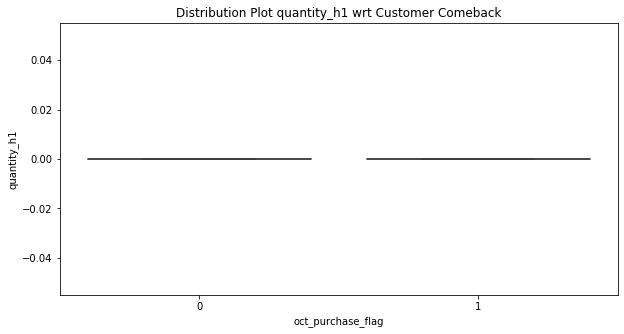

In [39]:
## After removing outliers again checking for distribution    
    
for col in num_cols:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data = train_data, y = col, x = "oct_purchase_flag")
    plt.xlabel("oct_purchase_flag")
    plt.ylabel(col)
    plt.title("Distribution Plot" + " " + col + " " + "wrt Customer Comeback")

    plt.show()

# Feature Engineering on Train Data

In [40]:
train_data.head(2)

,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,created_at_bill,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,...,quantity_ethical,quantity_generic,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1,oct_purchase_flag
0,468,6251676,6628790,cash,2019-04-01 09:09:51.000000,3.0,12.0,394.6,146.92,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0
1,468,6251676,6628790,cash,2019-04-10 17:23:29.000000,1.0,2.0,70.0,41.32,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0


In [41]:
current_year='2019-10-01'

In [42]:
train_data['created_at_bill'] =  pd.to_datetime(train_data['created_at_bill'])

In [43]:
train_data['date']=train_data['created_at_bill'].dt.date

##### New feature = Days

In [44]:
#old customer has less chance to come back---intuition
train_data['days'] = (pd.to_datetime(current_year) - pd.to_datetime(train_data['date'])).dt.days

In [45]:
train_data.drop(['date'],axis=1,inplace=True)

##### New feature = Discount

In [46]:
#lets find out discout, more discount then more chance to return of customer
train_data['discount']=train_data['mrp_bill']-train_data['total_spend_bill']

In [47]:
train_data.shape

(1184025, 23)

In [48]:
train_data.head()

,store_ref_id,customer_ref_id,doctor_ref_id,payment_method,created_at_bill,num_drugs_bill,total_quantity_bill,mrp_bill,total_spend_bill,return_value_bill,...,quantity_surgical,quantity_ayurvedic,quantity_general,quantity_otc,quantity_chronic,quantity_acute,quantity_h1,oct_purchase_flag,days,discount
0,468,6251676,6628790,cash,2019-04-01 09:09:51,3.0,12.0,394.6,146.92,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0,183,247.68
1,468,6251676,6628790,cash,2019-04-10 17:23:29,1.0,2.0,70.0,41.32,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0,174,28.68
2,468,6251676,6628790,cash,2019-04-15 21:55:02,1.0,2.0,70.0,41.66,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0,169,28.34
3,468,6251676,6628790,cash,2019-05-09 14:07:14,2.0,11.0,464.4,148.96,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,145,315.44
4,468,6702206,7298144,cash,2019-04-01 09:30:17,1.0,1.0,50.5,26.04,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,183,24.46


In [49]:
#we can delete created_at_bill as we ahve already calculated number of days from current day
train_data.drop('created_at_bill',axis=1,inplace=True)

In [50]:
train_data.shape

(1184025, 22)

In [51]:
train_data.payment_method.value_counts()   #we can merge phonepe, paytm,upi to online payment and check as cash to reduce the number of features

cash       1033440
card        121169
phonepe      18813
paytm        10195
upi            232
cheque         173
Name: payment_method, dtype: int64

##### Binning of categorical unique values

In [52]:
train_data['payment_method'] = train_data['payment_method'].replace('phonepe','online')
train_data['payment_method'] = train_data['payment_method'].replace('paytm','online')
train_data['payment_method'] = train_data['payment_method'].replace('upi','online')
train_data['payment_method'] = train_data['payment_method'].replace('cheque','cash')

In [53]:
train_data.payment_method.value_counts() 

cash      1033613
card       121169
online      29240
Name: payment_method, dtype: int64

# Target Encoding

### Converting categorical with large levels to numerical features

In [54]:
encoder=ce.TargetEncoder()

In [55]:
train_data['customer_ref_id']=encoder.fit_transform(train_data['customer_ref_id'],train_data['oct_purchase_flag'].astype('int'))

In [56]:
encoder1=ce.TargetEncoder()

In [57]:
train_data['doctor_ref_id']=encoder1.fit_transform(train_data['doctor_ref_id'],train_data['oct_purchase_flag'].astype('int'))

# Split the data into train and validation

In [58]:
y = train_data["oct_purchase_flag"]                     #Getting target attribute
X = train_data.drop('oct_purchase_flag', axis=1)        #Getting Independent Variables
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify = y)

In [59]:
## Getting the shape of train and validation

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(888018, 21)
(296007, 21)
(888018,)
(296007,)


## Split the attributes into numerical and categorical types

In [60]:
num_attr=X_train.select_dtypes(['int64','float64']).columns   #Saving Numerical columns
num_attr

Index(['customer_ref_id', 'doctor_ref_id', 'num_drugs_bill',
       'total_quantity_bill', 'mrp_bill', 'total_spend_bill',
       'return_value_bill', 'returned_quantity_bill', 'quantity_ethical',
       'quantity_generic', 'quantity_surgical', 'quantity_ayurvedic',
       'quantity_general', 'quantity_otc', 'quantity_chronic',
       'quantity_acute', 'quantity_h1', 'days', 'discount'],
      dtype='object')

In [61]:
cat_attr = X_train.select_dtypes('category').columns     # Saving Categorical columns
cat_attr

Index(['store_ref_id', 'payment_method'], dtype='object')

# Preparation for Model buillding

## Checking and Imputing Missing Values

In [62]:
print(X_train.isnull().sum())            #Checking null values

store_ref_id              0
customer_ref_id           0
doctor_ref_id             0
payment_method            2
num_drugs_bill            0
total_quantity_bill       0
mrp_bill                  0
total_spend_bill          0
return_value_bill         0
returned_quantity_bill    0
quantity_ethical          0
quantity_generic          0
quantity_surgical         0
quantity_ayurvedic        0
quantity_general          0
quantity_otc              0
quantity_chronic          0
quantity_acute            0
quantity_h1               0
days                      0
discount                  0
dtype: int64


In [63]:
print(X_val.isnull().sum())

store_ref_id              0
customer_ref_id           0
doctor_ref_id             0
payment_method            1
num_drugs_bill            0
total_quantity_bill       0
mrp_bill                  0
total_spend_bill          0
return_value_bill         0
returned_quantity_bill    0
quantity_ethical          0
quantity_generic          0
quantity_surgical         0
quantity_ayurvedic        0
quantity_general          0
quantity_otc              0
quantity_chronic          0
quantity_acute            0
quantity_h1               0
days                      0
discount                  0
dtype: int64


In [64]:
# Imputing Null values in Categorical columns

imputer = SimpleImputer(strategy='most_frequent')   
imputer = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer.transform(X_train[cat_attr])
X_val[cat_attr] = imputer.transform(X_val[cat_attr])

In [65]:
print(X_val.isnull().sum())

store_ref_id              0
customer_ref_id           0
doctor_ref_id             0
payment_method            0
num_drugs_bill            0
total_quantity_bill       0
mrp_bill                  0
total_spend_bill          0
return_value_bill         0
returned_quantity_bill    0
quantity_ethical          0
quantity_generic          0
quantity_surgical         0
quantity_ayurvedic        0
quantity_general          0
quantity_otc              0
quantity_chronic          0
quantity_acute            0
quantity_h1               0
days                      0
discount                  0
dtype: int64


In [66]:
print(X_train.isnull().sum()) 

store_ref_id              0
customer_ref_id           0
doctor_ref_id             0
payment_method            0
num_drugs_bill            0
total_quantity_bill       0
mrp_bill                  0
total_spend_bill          0
return_value_bill         0
returned_quantity_bill    0
quantity_ethical          0
quantity_generic          0
quantity_surgical         0
quantity_ayurvedic        0
quantity_general          0
quantity_otc              0
quantity_chronic          0
quantity_acute            0
quantity_h1               0
days                      0
discount                  0
dtype: int64


__Observation:__

 - All null values present in train data are imputed.

# Multicollinearity 

#### Standardizing the numerical variables

In [67]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

#Standardising train num columns to remove multicollinearity
X_train_num = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)

## Checking MultiCollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,1.494185,customer_ref_id
1,1.489452,doctor_ref_id
2,1.682175,num_drugs_bill
3,2.167581,total_quantity_bill
4,inf,mrp_bill
5,inf,total_spend_bill
6,1.101565,return_value_bill
7,1.040621,returned_quantity_bill
8,1.608857,quantity_ethical
9,1.776238,quantity_generic


In [69]:
for col in ['store_ref_id','payment_method']:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

In [70]:
X_train.dtypes

store_ref_id              category
customer_ref_id            float64
doctor_ref_id              float64
payment_method            category
num_drugs_bill             float64
total_quantity_bill        float64
mrp_bill                   float64
total_spend_bill           float64
return_value_bill          float64
returned_quantity_bill     float64
quantity_ethical           float64
quantity_generic           float64
quantity_surgical          float64
quantity_ayurvedic         float64
quantity_general           float64
quantity_otc               float64
quantity_chronic           float64
quantity_acute             float64
quantity_h1                float64
days                         int64
discount                   float64
dtype: object

## Initiating Pipeline 

#### Standardizing and One-hot encoding Categorical attributes 

In [71]:
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

In [72]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr]  + 
    [([categorical_col], OneHotEncoder(handle_unknown='ignore')) for categorical_col in cat_attr]
, df_out=True)

In [73]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [74]:
mapper.fit(X_train)

X_train = mapper.transform(X_train)
X_val = mapper.transform(X_val)

In [75]:
print(X_train.shape)
print(X_val.shape)

(888018, 65)
(296007, 65)


# Classification report

In [76]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

## Function to calculate accuracy, recall, precision and F1 score# 

In [77]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#  MODEL BUILDING

### Logistic Regression

In [78]:
log_mod = LogisticRegression(random_state=123)

In [79]:
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [80]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

##### Evaluating the model performance

In [81]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9744    1.0000    0.9870    347799
           1     1.0000    0.9831    0.9915    540219

    accuracy                         0.9897    888018
   macro avg     0.9872    0.9915    0.9892    888018
weighted avg     0.9900    0.9897    0.9897    888018


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9747    1.0000    0.9872    115933
           1     1.0000    0.9833    0.9916    180074

    accuracy                         0.9898    296007
   macro avg     0.9873    0.9916    0.9894    296007
weighted avg     0.9901    0.9898    0.9898    296007


               Confusion Matrix FOR TRAIN DATA
            
[[347784     15]
 [  9139 531080]]

               Confusion matrix FOR VALIDATION DATA
            
[[115929      4]
 [  3010 177064]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.989692,0.983083,0.999972,0.991455,0.989818,0.983285,0.999977,0.991561




# ROC AUC Curve

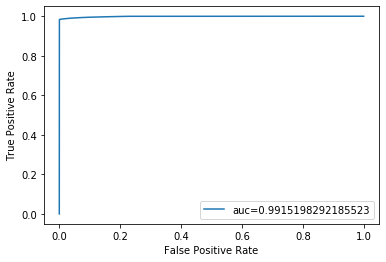

In [82]:
y_pred_train_prob = log_mod.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 1)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Decision Tree Classifier

In [83]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=123,ccp_alpha =0.05)

# Train Decision Tree Classifer
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, class_weight='balanced',
                       random_state=123)

In [84]:
y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [85]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9743    1.0000    0.9870    347799
           1     1.0000    0.9830    0.9914    540219

    accuracy                         0.9897    888018
   macro avg     0.9872    0.9915    0.9892    888018
weighted avg     0.9899    0.9897    0.9897    888018


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9746    1.0000    0.9871    115933
           1     1.0000    0.9832    0.9915    180074

    accuracy                         0.9898    296007
   macro avg     0.9873    0.9916    0.9893    296007
weighted avg     0.9901    0.9898    0.9898    296007


               Confusion Matrix FOR TRAIN DATA
            
[[347799      0]
 [  9162 531057]]

               Confusion matrix FOR VALIDATION DATA
            
[[115933      0]
 [  3019 177055]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.989692,0.983083,0.999972,0.991455,0.989818,0.983285,0.999977,0.991561
1,DecisionTree,0.989683,0.983040,1.000000,0.991448,0.989801,0.983235,1.000000,0.991546


# Check important features

### Feature Importances

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
#from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

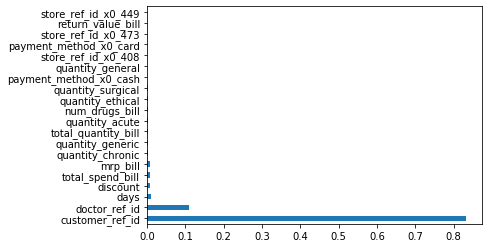

In [88]:
ranked_features = pd.Series(model.feature_importances_,index = X_train.columns)
#plt.figure(figsize= (10,10))
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

# Max_depth

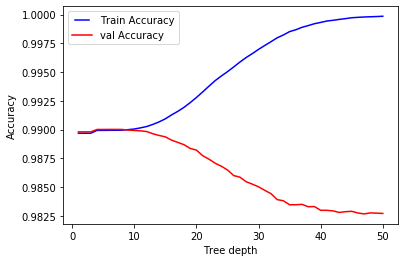

In [91]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

## RandomForestClassifier Model

In [92]:
clf2 = RandomForestClassifier()

In [93]:
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_train = clf2.predict(X_train)
y_pred_val = clf2.predict(X_val)

In [95]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000    347799
           1     1.0000    1.0000    1.0000    540219

    accuracy                         1.0000    888018
   macro avg     1.0000    1.0000    1.0000    888018
weighted avg     1.0000    1.0000    1.0000    888018


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9753    0.9995    0.9873    115933
           1     0.9997    0.9837    0.9916    180074

    accuracy                         0.9899    296007
   macro avg     0.9875    0.9916    0.9894    296007
weighted avg     0.9901    0.9899    0.9899    296007


               Confusion Matrix FOR TRAIN DATA
            
[[347798      1]
 [    27 540192]]

               Confusion matrix FOR VALIDATION DATA
            
[[115872     61]
 [  2931 177143]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.989692,0.983083,0.999972,0.991455,0.989818,0.983285,0.999977,0.991561
1,DecisionTree,0.989683,0.983040,1.000000,0.991448,0.989801,0.983235,1.000000,0.991546
2,Random Forest,0.999968,0.999950,0.999998,0.999974,0.989892,0.983723,0.999656,0.991626
